# Simple Linear Regression: Application

In this notebook, we examine how to apply simple linear regression in Python on a sample dataset containing two variables—an individual's years of experience, and their salary.

Sources:
1. <a href='https://www.udemy.com/course/machinelearning/'>Machine Learning A-Z™: Hands-On Python & R In Data Science</a>

In [1]:
# Import machine learning support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import analytical libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Import other support
import os

style.use('ggplot')

## Load & Preview Data

In [2]:
# Define salary data file path
salary_data_file_path = os.path.join('Data', 'Salary_Data.csv')

# Load salary data
salary_data = pd.read_csv(salary_data_file_path)

In [3]:
# Preview data
display(salary_data.shape)
display(salary_data.head())
display(salary_data.describe())
display(salary_data.isna().sum())

(30, 2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


YearsExperience    0
Salary             0
dtype: int64

## Prepare Data

In [4]:
# Define features and labels
X = salary_data['YearsExperience'].values.reshape(-1,1)
y = salary_data['Salary'].values.reshape(-1,1)


# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## Prepare Classifier

In [5]:
# Initialize regression object
regressor = LinearRegression()

# Fit regressor to data
regressor.fit(X_train, y_train)

# Test classifier
print(regressor.score(X_test, y_test))

0.988169515729126


## Visualize Classifier

When we visualize our data, we will first plot our known salaries from the training set with a scatter plot, then plot our regression line to examine how close it is to the actual points.

Both plots use the same input for the $x$-axis—our training years of experience.  The input for the $y$-axis will differ however.  For known values on the scatter plot, we plot the actual points, and for the regression line plot, the regression line itself will be our input.

When repeating the above for the testing set, the regression line inputs will be the same.  On both graphs, we are plotting the same regression line that we trained using training data, and then predicted values with on the testing set.

In [6]:
# Predict test labels
y_predict = regressor.predict(X_train)

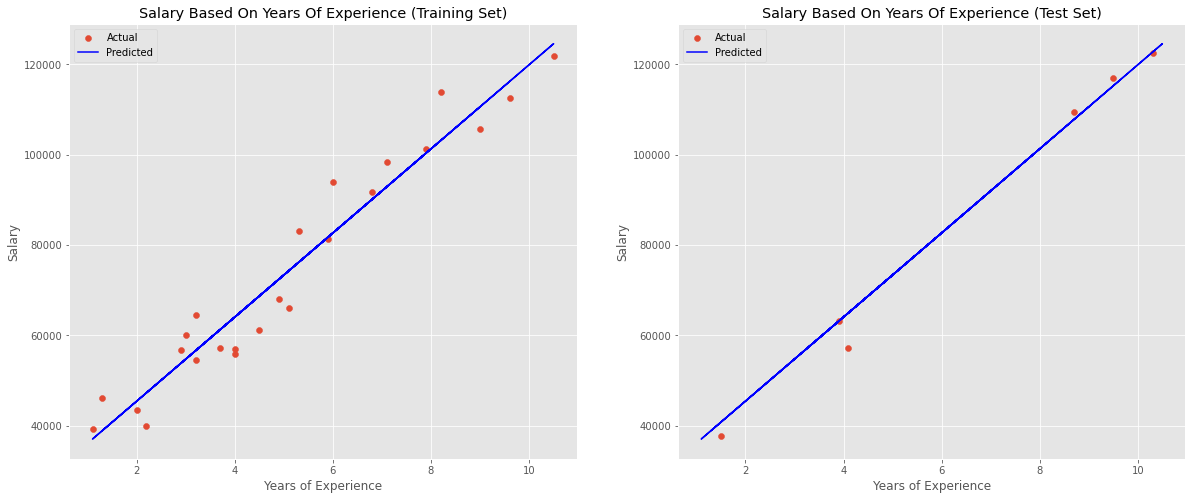

In [7]:
# Create figure
plt.figure(figsize=(20,8))

# Plot training data
plt.subplot(1,2,1)

# Plot known data 
plt.scatter(X_train, y_train, label='Actual')

# Plot predicted data
plt.plot(X_train, y_predict, color='blue', label='Predicted')

# Define title
plt.title('Salary Based On Years Of Experience (Training Set)')

# Define Legend
plt.legend()

# Define labels
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Plot testing data
plt.subplot(1,2,2)

# Plot known data 
plt.scatter(X_test, y_test, label='Actual')

# Plot predicted data
plt.plot(X_train, y_predict, color='blue', label='Predicted')

# Define title
plt.title('Salary Based On Years Of Experience (Test Set)')

# Define Legend
plt.legend()

# Define labels
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show plot
plt.show()

# Show plot
plt.show()

## Parking Lot Notes

attributes to get the slope and $y$-intercept.  Compare to the "Appling Linear Regression" section in the <a href='https://github.com/TylerTompa/LearnMachineLearning/blob/master/R/Regression/Simple%20Linear%20Regression/2.%20Simple%20Linear%20Regression%20In%20R.ipynb'>R notebook</a>.

In [10]:
# Return coefficients
print(regressor.coef_)
print(regressor.intercept_)

[[9312.57512673]]
[26780.09915063]
